In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples
Let's walk through these two functions together

In [16]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [17]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')

(back to slides)
# Randomized Control Trial
Let's look at the example from the textbook the discusses whether
botulinum toxin A causes pain relief

The data is stored in a csv file named `bta.csv`.
How can we load in the data?

In [3]:
bta = Table.read_table("bta.csv")
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


**QUESTION:** What do the columns and values represent?

What table function can we use to help us figure this out? 

*Hint: what function shows us the statistics about the values a column has?*

<details>
<summary>Solution</summary>
  botox.pivot('Result', 'Group')
</details>

In [5]:
bta.group("Result")

Result,count
0,20
1,11


In [7]:
bta.pivot("Result", "Group")

Group,0.0,1.0
Control,14,2
Treatment,6,9


**QUESTION:** What statistic should we use here to see a difference between the groups?

<details>
<summary>Review</summary>
  Copy the following in markdown below <br>
    ![title](hypothesis_testing_stat_review.png)
</details>

![title](hypothesis_testing_stat_review.png)

<details>
<summary>Solution</summary>
  difference of means
</details>

**QUESTION:** How do we compute that difference?

<details>
<summary>Solution</summary>
  botox.group('Group', np.average)
    <br><br>
  tmp_tbl = botox.group('Group', np.average)
   <br><br>
    observed_stat = bta_means_tbl.column(1).item(1) - bta_means_tbl.column(1).item(0)
observed_stat
</details>


In [9]:
bta.group('Group', np.average)

tmp_tbl = bta.group('Group', np.average)


In [10]:
bta_means_tbl =  bta.group('Group', np.average)

bta_means_tbl

Group,Result average
Control,0.125
Treatment,0.6


In [11]:
bta_means_tbl.column('Result average')

array([ 0.125,  0.6  ])

In [14]:
observed_stat = bta_means_tbl.column('Result average').item(1) - bta_means_tbl.column('Result average').item(0)
observed_stat

0.475

In [19]:
difference_of_means(bta, "Result","Group")

0.475

##  Testing the Hypothesis

**Question:** How can we use the functions from the top?
<details>
<summary>Solution</summary>
  difference of means(botox, 'Result', 'Group')
</details>  

In [20]:
observed_diff = difference_of_means(bta, "Result","Group")
observed_diff

0.475

**Question:** How can we simulate this statistic once?
<details>
<summary>Solution</summary>
  one_simulated_difference(botox, 'Result', 'Group')
</details> 

In [22]:
one_simulated_difference(bta, "Result","Group")

-0.3

Now let's simulate that 10k times

In [23]:
# answer is below
all_simulated_stats = make_array()
for i in np.arange(1e4):
    simulated_stat = one_simulated_difference(bta, "Result", "Group") # simulate the statistic once under the null hypothesis
    all_simulated_stats = np.append(all_simulated_stats, simulated_stat) # keep track of the simulated value

len(all_simulated_stats) == 1e4 # confirm that we have 10K simulated statistics

True

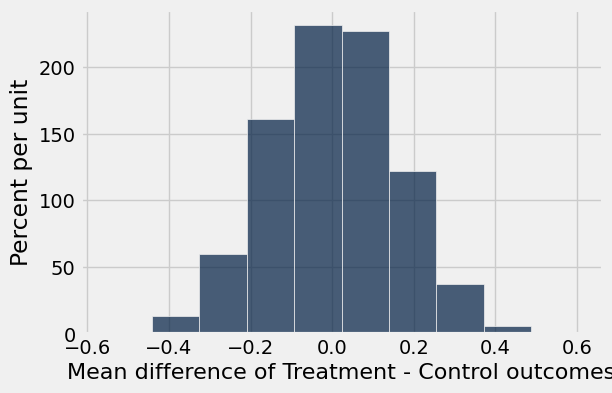

In [24]:
Table().with_column('Mean difference of Treatment - Control outcomes', all_simulated_stats).hist() #bins=np.arange(-0.6, 0.6, 0.01))

**Question:** Is the observed statistic statistically significant?

In [25]:
observed_stat

0.475

**Question:** Which of the following is our p-value? 

Hint: Which tail should we use?

In [30]:
# p-value1
p_1 = sum(all_simulated_stats >= observed_stat)/len(all_simulated_stats)

# p-value2
p_2 = sum(all_simulated_stats <= observed_stat)/len(all_simulated_stats)

p_1, p_2

(0.0077000000000000002, 0.99919999999999998)

In [29]:
p_1 + p_2

1.0

**Question:** Is this statistically significant?

(back to slides)
# Percentiles

In [32]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)
x

array([43, 20, 51,  7, 28, 34])

In [37]:
# Step 1. Sort the data
sorted_x = np.sort(x)
sorted_x

array([ 7, 20, 28, 34, 43, 51])

In [ ]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

In [34]:
len(x)

6

In [35]:
len(x) * .55

3.3000000000000003

In [44]:
sorted_x.item(int(3.3000000000000003))

34

In [45]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

34

(back to slides)
## Percentiles questions

In [46]:
s= [1, 7, 3, 9, 5]
# 1, 3, 5, 7, 9

In [47]:
percentile(10, s)

1

In [48]:
#1 
percentile(10, s) == 0

False

In [52]:
percentile(39, s), percentile(40, s), percentile(41, s) 

(3, 3, 5)

In [51]:
# 2 
percentile(39, s) == percentile(40, s)

True

In [53]:
# 3
percentile(40, s) == percentile(41, s) 

False

In [54]:
# 4
percentile(50, s) == 5 

True

# Estimation

### Sample Median

In [55]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


**Question:** What is this dataset?

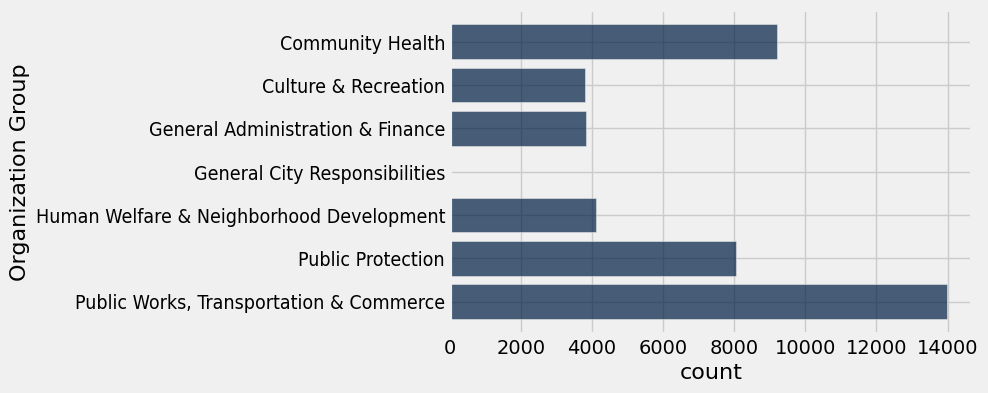

In [58]:
sf.group(3).barh(0)

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [59]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


**Question:** Who is making the most money?

In [67]:
salary_sf.sort('Total Compensation', descending=True).column('Job').item(0)

'Chief Investment Officer'

**Question:** Who is making the least money?

In [68]:
salary_sf.sort('Total Compensation', descending=True).column('Job').item(-1) # will give us the last item in the array

'Firefighter'

In [69]:
salary_sf.sort('Total Compensation', descending=False).column('Job').item(0)

'Firefighter'

In [70]:
salary_sf.sort('Total Compensation', descending=False)

Organization Group,Job,Total Compensation
Public Protection,Firefighter,-423.76
Community Health,PS Aide Health Services,-410.61
Public Protection,"Counselor, Juvenile Hall",-159.12
General Administration & Finance,IS Business Analyst-Senior,-26.53
General Administration & Finance,Planner 1,-9.51
"Public Works, Transportation & Commerce",IS Engineer-Principal,-3.1
Public Protection,Senior Stationary Engineer,-0.01
Public Protection,Manager I,0
General City Responsibilities,Assistant Recreation Director,1.27
Community Health,Cook,2.38


**Question:** What is the typical salary? Should we compute the mean or median for this?

In [ ]:
# median is the 50th percentile

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [72]:
pop_median = percentile(50, salary_sf.column(2))
pop_median

98174.899999999994

In [73]:
np.median(salary_sf.column(2))

98174.899999999994

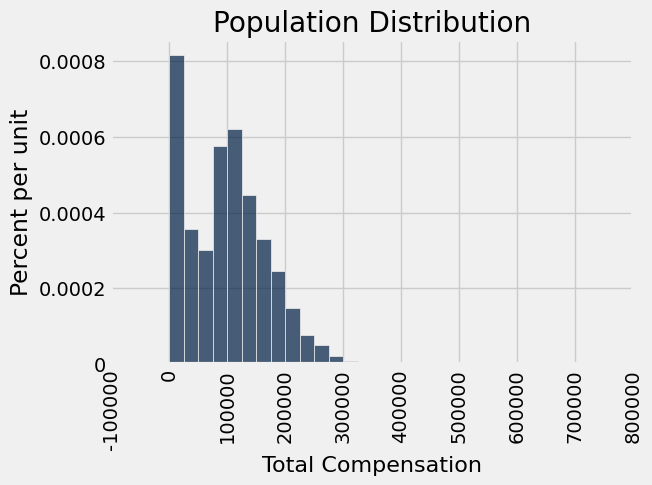

In [74]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

In [75]:
sf.num_rows

42989

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [76]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,31653,47071.8,0,1059.39,48131.1,9703.9,9461.67,4049.57,23215.1,71346.3
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H003,EMT/Paramedic/Firefighter,26340,111630,7261.55,19955.6,138847,24654,12247.5,2319.21,39220.7,178068
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,9900,Public Service Aide,9916,Public Svc Aide-Public Works,31477,2562.23,0,75.53,2637.76,0,1093.12,212.44,1305.56,3943.32
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1406,Senior Clerk,25680,46761.6,253.01,1000,48014.6,10882.8,10349.3,3893.5,25125.6,73140.2
Calendar,2015,1,Public Protection,PDR,Public Defender,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),30316,184289,0,5185.78,189475,38130.6,12424.5,10918.1,61473.2,250948


In [77]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

94465.589999999997

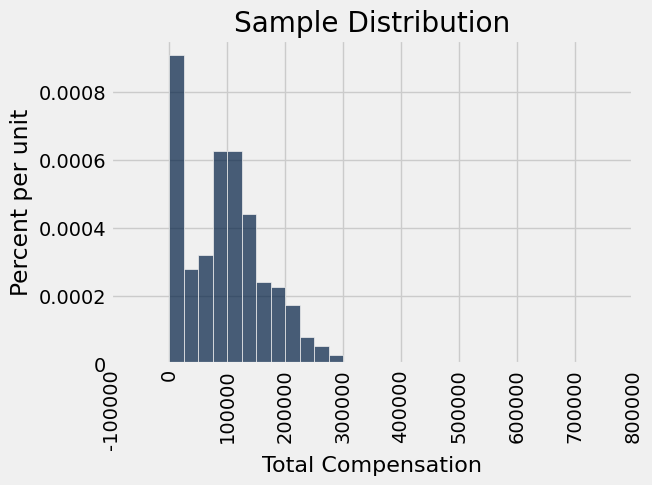

In [78]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

**Question:** How far off is our estimate from the true median

In [79]:
pop_median, estimate_median, abs(pop_median - estimate_median)

(98174.899999999994, 94465.589999999997, 3709.3099999999977)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [ ]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?
    
    

sample_median = generate_sample_median(300)
sample_median

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>


In [ ]:
error = ...
error

(back to slides)
# Quantifying Uncertainty

Lets take 1k estimates where each sample has 300 individuals


In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

Let's plot the medians

In [ ]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

Lets plot the errors

In [ ]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

(back to slides)
# Bootstrap

In [ ]:
our_sample

In [ ]:
# Take a bootstrap (re)sample of size 300, WITH replacement

# Sample from our sample
boot_sample = our_sample.sample(with_replacement=True)
#boot_sample

Let's compare the median from our sample with the median of the boostrapped sample

In [ ]:
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
boot_sample_median = percentile(50, boot_sample.column('Total Compensation'))

In [ ]:
# Show the bootstrap sample 
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

### Multiple Bootstraps
Let's take 1k bootstraps. Lets start by implementing the following function

<details>
<summary>Solution</summary>
   single_sample = our_sample.sample()
   return percentile(50, single_sample.column('Total Compensation'))
</details>  

In [ ]:
def one_bootstrap_median():
    single_sample = ...
    return ...

Now let's keep track of 1k bootstrapped median

In [ ]:
# Bootstrap our sample 1000 times
bootstrap_medians = ...
for i in np.arange(1000):
    new_median = ...
    bootstrap_medians = ...

Let's visualize these bootstrapped medians

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

# 95% Confidence Interval

**Question**: How could we make an interval based on the middle 95% of bootstrap samples?

- *Hint 1:* Remember we stored the bootstrapped medians in an array called `bootstrap_medians`
- *Hint 2:* What did we learn about in the begining of this lecture?


<details>
<summary>Solution</summary>
  left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
</details>  

In [ ]:
# Make an interval based on the middle 95% of bootstrap samples

left = ...
right = ...

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [ ]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

What is the mean age?

In [ ]:
mean_age = ...
mean_age

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [ ]:
def one_bootstrap_mean():
    return ...

Let's compute 1k bootstrapped samples

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');